In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sys
import os
import matplotlib.colors as colors
import matplotlib.cm as mplcm
import matplotlib as mpl

sys.path.append(r'C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\script')

from plot_config import *

13.004800000000003
9.7536


In [2]:
NUM_COLORS = 11
cm = plt.get_cmap("tab10")
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS - 1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

markers = ["o", "v", "^", ">", "<", "s", "P", "X", "D", "d", "o"]

In [3]:
dataset=pd.read_csv('data_IV.csv')
print(dataset)

     Voltage   Current
0   0.000000  0.000040
1   0.011884  0.000031
2   0.019978  0.000042
3   0.029856  0.000055
4   0.039833  0.000026
..       ...       ...
95  0.951042  0.006195
96  0.960875  0.006354
97  0.970883  0.006553
98  0.980979  0.006725
99  0.991082  0.006922

[100 rows x 2 columns]


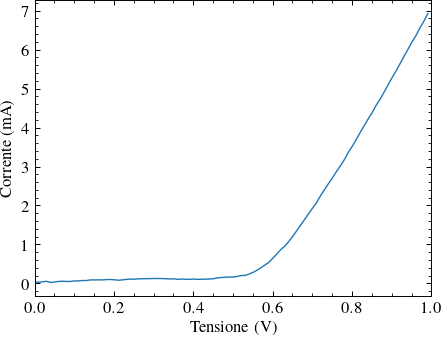

In [4]:
plt.clf()
plt.plot(dataset.iloc[:, 0], dataset.iloc[:, 1] * 1000, linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")

save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
filename = "char_IV.pdf"
full_save_path = os.path.join(save_path, filename)

plt.xlim(0, 1)

plt.xlabel(r'Tensione (\si{\volt})')
plt.ylabel(r'Corrente (\si{\milli\ampere})')

plt.savefig(full_save_path)

plt.show()

In [8]:
left_limit_value=0.7
filtered_dataset = dataset[dataset.iloc[:,0] >= left_limit_value]
thined_ds=filtered_dataset.iloc[1::2]

active_ds=thined_ds

print(active_ds)

slope, intercept, r, p, std_err =stats.linregress(active_ds.iloc[:,0],active_ds.iloc[:,1]*1000)
def myfunc(x):
  return slope*x+intercept

mymodel = list(map(myfunc, active_ds.iloc[:,0]))


     Voltage   Current
71  0.711019  0.002079
73  0.730802  0.002409
75  0.751122  0.002716
77  0.771254  0.003025
79  0.791084  0.003370
81  0.811099  0.003701
83  0.831127  0.004054
85  0.851141  0.004389
87  0.870970  0.004730
89  0.891075  0.005099
91  0.910916  0.005449
93  0.931091  0.005827
95  0.951042  0.006195
97  0.970883  0.006553
99  0.991082  0.006922
0.9992476257541434


0.99924763


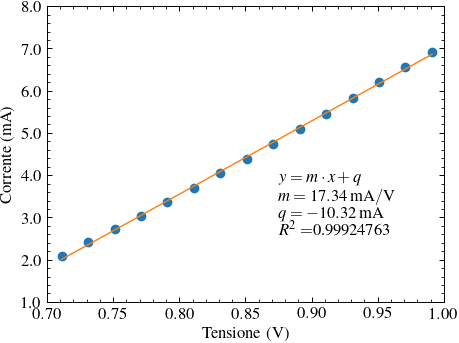

In [39]:
filename = "char_IV_filtered.pdf"
full_save_path = os.path.join(save_path, filename)

plt.scatter(active_ds.iloc[:, 0], active_ds.iloc[:, 1] * 1000, color=scalarMap.to_rgba(0))
plt.plot(active_ds.iloc[:, 0], mymodel, linewidth=1, markersize=5, color=scalarMap.to_rgba(1))

plt.xlabel(r'Tensione (\si{\volt})')
plt.ylabel(r'Corrente (\si{\milli\ampere})')

plt.xlim(0.7, 1)

slope_rounded = round(slope, 2)
intercept_rounded = round(intercept, 2)
r_2=round(r*r, 8)

print(r_2)

plt.text(
    0.875,
    0.002575 * 1000, 
    "\n".join((r"$y=m \cdot x + q$",
               r"$m=\SI{%.2f}{\milli\ampere/\volt}$"%slope_rounded,
               r"$q=\SI{%.2f}{\milli\ampere}$"%intercept_rounded,
               r"$R^2=$%.8f"%r_2))
)

plt.gca().yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

yticks = plt.gca().get_yticks()
plt.gca().set_yticks([round(y, 1) for y in yticks])

plt.savefig(full_save_path)
plt.show()